In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch
import optuna
import os
import pytorch_lightning as pl
import yaml

from Data.Drosophilla.FlyDataMod import FlyDataModule
from IPython.core.debugger import set_trace
from Models import BiLSTM as bi
from torch import nn as nn
from Utils import callbacks as cb
from Utils import evaluations as ev
from Utils import HyperParams as hp
from Utils import loggers as lg

np.random.seed(0)

In [4]:
def runBiLSTM_Exp(
    trial,
    label_type,
    label_val,
    lr,
    batch_size,
    num_layers,
    hidden_size,
    dropout,
    bias):
    logger = lg.DictLogger(trial.number,
                          root_dir)
    trainer = pl.Trainer(
        gpus=1,
        logger=logger,
        max_epochs=50,
        callbacks=[cb.getcb()],
        default_root_dir=root_dir)
    
    dm = FlyDataModule(cell_line="S2",
                     data_win_radius=5,
                     batch_size=batch_size,
                     label_type=label_type,
                     label_val=label_val)
    dm.setup()
    
    hparams = {'cell_line':"S2",
              "data_win_radius":5,
              "label_type":label_type,
              "batch_size":batch_size}
    
    model_bilstm = bi.BiLSTMModule(
                    input_size=29,
                    hidden_size=hidden_size,
                    num_layers=num_layers,
                    dropout=dropout,
                    bias=bias,
                    lr=lr,
                    hparams=hparams
                )
    model_bilstm.cuda()
    
    trainer.fit(model_bilstm, dm)
    score = logger.metrics[-1]['val weighted mse loss']
    if np.isnan(score):
        score = 99999999
    return score

def objective(trial):
    lr          = trial.suggest_categorical("lr", [1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
    batch_size  = trial.suggest_categorical("batch_size", [1,4,16,64])
    num_layers  = trial.suggest_categorical("num_layers", [1,2,3,4,5,6])
    hidden_size = trial.suggest_categorical("hidden_size", [64])
    dropout     = trial.suggest_categorical("dropout", [0.7, 0.8, 0.8, 1.0])
    bias        = trial.suggest_categorical("bias", [True, False])
    print(lr, batch_size, num_layers, hidden_size, dropout, bias)
    return runBiLSTM_Exp(
        trial=trial,
        label_type=label_type,
        label_val=label_val,
        lr=lr,
        batch_size=batch_size,
        num_layers=num_layers,
        hidden_size=hidden_size,
        dropout=dropout,
        bias=bias)
    

In [3]:
label_type = "gamma"
label_val  = 0
root_dir   = "Experiments/Table_7_LSTM_Tunning_Gamma"
if not os.path.isdir(root_dir):
    os.mkdir(root_dir)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
hp.save_hyperparams(root_dir,
                   study.best_trial.number)


[I 2021-04-08 11:38:17,748] A new study created in memory with name: no-name-44848bb5-ec37-401b-b4c4-05f040d3b3ea


0.001 1 6 64 1.0 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_7_LSTM_Tunning_Gamma



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 30.0 K
------------------------------
30.0 K    Trainable params
0         Non-trainable params
30.0 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-08 13:06:45,259] Trial 0 finished with value: 1.5892491340637207 and parameters: {'lr': 0.001, 'batch_size': 1, 'num_layers': 6, 'hidden_size': 64, 'dropout': 1.0, 'bias': True}. Best is trial 0 with value: 1.5892491340637207.


0.001 1 1 64 0.8 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set


/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


logging them hyperparams:Experiments/Table_7_LSTM_Tunning_Gamma



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 16.5 K
------------------------------
16.5 K    Trainable params
0         Non-trainable params
16.5 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-08 13:09:22,105] Trial 1 finished with value: 1.2551747560501099 and parameters: {'lr': 0.001, 'batch_size': 1, 'num_layers': 1, 'hidden_size': 64, 'dropout': 0.8, 'bias': True}. Best is trial 1 with value: 1.2551747560501099.


1e-05 64 3 64 0.7 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_7_LSTM_Tunning_Gamma



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 21.9 K
------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-08 13:11:13,230] Trial 2 finished with value: 1.8704969882965088 and parameters: {'lr': 1e-05, 'batch_size': 64, 'num_layers': 3, 'hidden_size': 64, 'dropout': 0.7, 'bias': True}. Best is trial 1 with value: 1.2551747560501099.


0.1 64 3 64 1.0 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_7_LSTM_Tunning_Gamma



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 21.9 K
------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-08 13:11:29,065] Trial 3 finished with value: 1.5985581874847412 and parameters: {'lr': 0.1, 'batch_size': 64, 'num_layers': 3, 'hidden_size': 64, 'dropout': 1.0, 'bias': True}. Best is trial 1 with value: 1.2551747560501099.


0.01 16 3 64 0.8 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_7_LSTM_Tunning_Gamma



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 21.9 K
------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-08 13:12:09,911] Trial 4 finished with value: 1.1413205862045288 and parameters: {'lr': 0.01, 'batch_size': 16, 'num_layers': 3, 'hidden_size': 64, 'dropout': 0.8, 'bias': True}. Best is trial 4 with value: 1.1413205862045288.


0.0001 1 3 64 0.8 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_7_LSTM_Tunning_Gamma



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 21.9 K
------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-08 13:27:05,482] Trial 5 finished with value: 1.0975468158721924 and parameters: {'lr': 0.0001, 'batch_size': 1, 'num_layers': 3, 'hidden_size': 64, 'dropout': 0.8, 'bias': True}. Best is trial 5 with value: 1.0975468158721924.


0.001 1 6 64 0.7 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_7_LSTM_Tunning_Gamma



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 30.0 K
------------------------------
30.0 K    Trainable params
0         Non-trainable params
30.0 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-08 13:57:23,606] Trial 6 finished with value: 1.267830491065979 and parameters: {'lr': 0.001, 'batch_size': 1, 'num_layers': 6, 'hidden_size': 64, 'dropout': 0.7, 'bias': True}. Best is trial 5 with value: 1.0975468158721924.


0.0001 64 4 64 0.7 False


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_7_LSTM_Tunning_Gamma



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 20.5 K
------------------------------
20.5 K    Trainable params
0         Non-trainable params
20.5 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-08 13:57:43,311] Trial 7 finished with value: 1.9655319452285767 and parameters: {'lr': 0.0001, 'batch_size': 64, 'num_layers': 4, 'hidden_size': 64, 'dropout': 0.7, 'bias': False}. Best is trial 5 with value: 1.0975468158721924.


0.0001 16 1 64 1.0 False


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set


/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=1.0 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


logging them hyperparams:Experiments/Table_7_LSTM_Tunning_Gamma



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 15.5 K
------------------------------
15.5 K    Trainable params
0         Non-trainable params
15.5 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-08 14:00:19,549] Trial 8 finished with value: 1.0963908433914185 and parameters: {'lr': 0.0001, 'batch_size': 16, 'num_layers': 1, 'hidden_size': 64, 'dropout': 1.0, 'bias': False}. Best is trial 8 with value: 1.0963908433914185.


1e-05 64 1 64 0.7 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set


/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.7 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


logging them hyperparams:Experiments/Table_7_LSTM_Tunning_Gamma



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 16.5 K
------------------------------
16.5 K    Trainable params
0         Non-trainable params
16.5 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-08 14:01:35,823] Trial 9 finished with value: 1.8041006326675415 and parameters: {'lr': 1e-05, 'batch_size': 64, 'num_layers': 1, 'hidden_size': 64, 'dropout': 0.7, 'bias': True}. Best is trial 8 with value: 1.0963908433914185.


Everything set


/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent

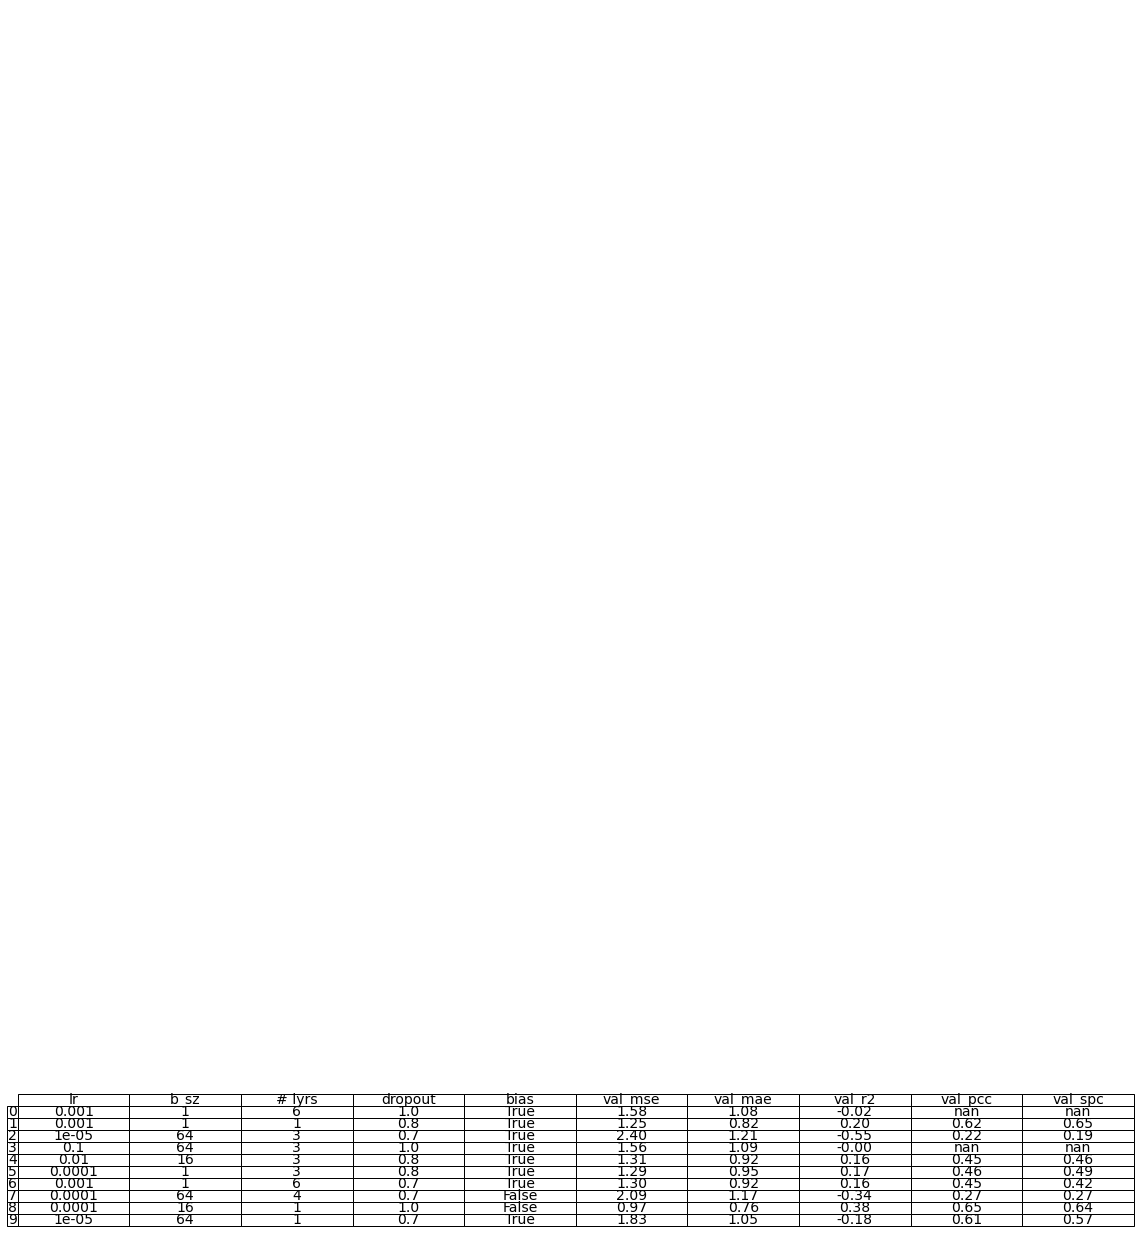

In [5]:
#display table 7
label_type = "gamma"
label_val  = 0
root_dir   = "Experiments/Table_7_LSTM_Tunning_Gamma"
dm         = FlyDataModule(cell_line="S2",
                          data_win_radius=5,
                          batch_size=1,
                          label_type=label_type,
                          label_val=label_val)
dm.setup()
vals = []

exps = sorted(glob.glob(root_dir+"/optuna/*"))
for e, exp in enumerate(exps):
    layer_weights = glob.glob(exp+"/checkpoints/*")[0]
    hparams       = yaml.full_load(open(glob.glob(exp+"/hparams.yaml")[0], 'r'))
    model         = bi.BiLSTMModule.load_from_checkpoint(layer_weights).to("cuda:0")
    row           = []
    row.append(hparams['lr'])
    row.append(hparams['hparams']['batch_size'])
    row.append(hparams['num_layers'])
    row.append(hparams['dropout'])
    row.append(hparams['bias'])
    mm            = ev.getModelMetrics(model, dm, 'val', clip_type="gamma").values()
    fmm           = list(map(lambda x: "{:.2f}".format(x), mm ))
    row.extend(fmm)
    vals.append(row)
cols = ['lr','b_sz', '# lyrs', 'dropout','bias','val_mse','val_mae','val_r2','val_pcc','val_spc']
fig, ax = plt.subplots(1, figsize=(20,20))
table   = ax.table(vals,
                  cellLoc="center",
                  colLabels=cols,
                  rowLabels=list(range(0, len(exps))))
table.set_fontsize(14)
ax.axis('off')
plt.show()

Everything set
Experiments/Table_7_LSTM_Tunning_Gamma/optuna/version_1/checkpoints/epoch=3-step=15835.ckpt


/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


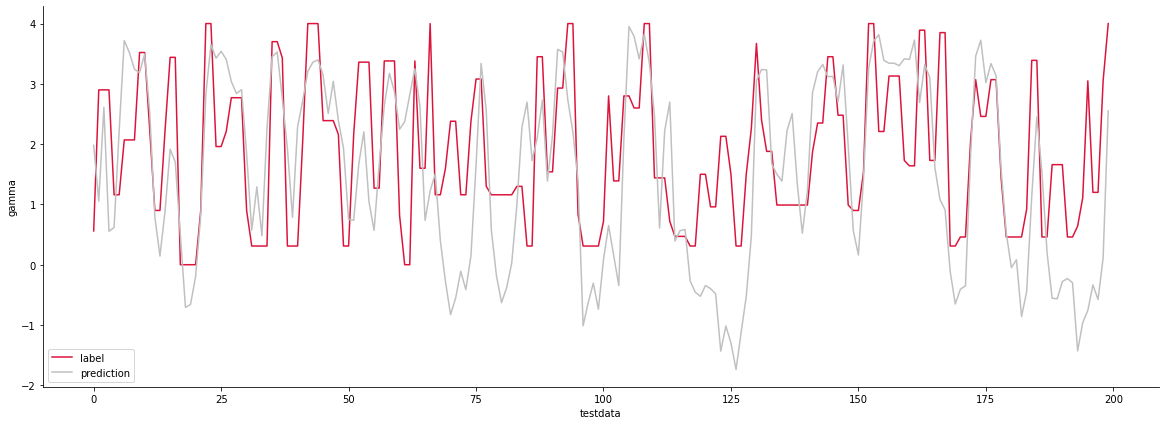

In [11]:
dm = FlyDataModule(cell_line="S2",
                  data_win_radius=5,
                  batch_size=1,
                  label_type="gamma",
                  label_val=0)
dm.setup()
layer_weights = glob.glob("Experiments/Table_7_LSTM_Tunning_Gamma/optuna/version_1/checkpoints/*")[0]
print(layer_weights)
model         = bi.BiLSTMModule.load_from_checkpoint(layer_weights).to("cuda:0")
ev.createPlot(model, dm, "test", "idk", clip_type="gamma")

In [36]:
#to csv
import pandas as pd
ar_val   = np.array(vals)
ar_col   = np.expand_dims(np.array(cols),0)
csv_data = np.vstack((ar_col, ar_val))
pd.DataFrame(csv_data).to_csv("Experiments/Table_7_LSTM_Tunning_Gamma/Sup_7_Results.csv")
